## Import

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplhep as hep
hep.style.use("CMS")

## Load file and specify the board name

In [173]:
con = sqlite3.connect('../../ETROC-Data/BaselineHistory_CC_Jan2024_CERN.sqlite')
df = pd.read_sql_query("SELECT * from baselines", con)

## Print the board name

In [25]:
column_values = df['chip_name']

# Print the unique elements in the column
unique_elements = column_values.unique()
for element in unique_elements:
    print(element)

ET2p01_Bar4


## Print the saved notes for dedicate board name

In [177]:
chip_name = 'ET2p01_Bar4'
column_values = df[(df['chip_name'] == chip_name)]['note']

# Print the unique elements in the column
unique_elements = column_values.unique()
for element in unique_elements:
    if('22C' in element):
        print(element)

Run0_Overnight22C_Jan_18_2024_time_3s
Run1_Overnight22C_Jan_18_2024_time_3s
Run2_Overnight22C_Jan_18_2024_time_3s
Run3_Overnight22C_Jan_18_2024_time_3s
Run4_Overnight22C_Jan_18_2024_time_3s
Run5_Overnight22C_Jan_18_2024_time_3s
Run6_Overnight22C_Jan_18_2024_time_3s
Run7_Overnight22C_Jan_18_2024_time_3s
Run8_Overnight22C_Jan_18_2024_time_3s
Run9_Overnight22C_Jan_18_2024_time_3s
Run10_Overnight22C_Jan_18_2024_time_3s
Run11_Overnight22C_Jan_18_2024_time_3s
Run12_Overnight22C_Jan_18_2024_time_3s
Run13_Overnight22C_Jan_18_2024_time_3s
Run14_Overnight22C_Jan_18_2024_time_3s
Run15_Overnight22C_Jan_18_2024_time_3s
Run16_Overnight22C_Jan_18_2024_time_3s
Run17_Overnight22C_Jan_18_2024_time_3s
Run18_Overnight22C_Jan_18_2024_time_3s
Run19_Overnight22C_Jan_18_2024_time_3s
Run20_Overnight22C_Jan_18_2024_time_3s
Run21_Overnight22C_Jan_18_2024_time_3s
Run22_Overnight22C_Jan_18_2024_time_3s
Run23_Overnight22C_Jan_18_2024_time_3s
Run24_Overnight22C_Jan_18_2024_time_3s
Run25_Overnight22C_Jan_18_2024_time

## Select the data based on the board name and note

In [169]:
col = 8
row = 8

In [170]:
base_df = df[(df['chip_name'] == chip_name) & (df['col'] == col) & (df['row'] == row)]
base_df

,row,col,baseline,noise_width,timestamp,chip_name,note
2,8,8,513,5,2024-01-17 11:46:57.616136,ET2p01_Bar4,Run0_m25_Jan_17_2024
6,8,8,511,5,2024-01-17 11:47:04.484868,ET2p01_Bar4,Run1_m25_Jan_17_2024
10,8,8,515,6,2024-01-17 11:47:11.463263,ET2p01_Bar4,Run2_m25_Jan_17_2024
14,8,8,511,6,2024-01-17 11:47:18.397618,ET2p01_Bar4,Run3_m25_Jan_17_2024
18,8,8,513,5,2024-01-17 11:47:25.155526,ET2p01_Bar4,Run4_m25_Jan_17_2024
...,...,...,...,...,...,...,...
31576,8,8,390,5,2024-01-19 01:39:55.866336,ET2p01_Bar4,Run115_22C_CCoff_dooropen_Jan_18_2024_time_3s
31580,8,8,392,5,2024-01-19 01:40:00.592175,ET2p01_Bar4,Run116_22C_CCoff_dooropen_Jan_18_2024_time_3s
31584,8,8,391,6,2024-01-19 01:40:05.334163,ET2p01_Bar4,Run117_22C_CCoff_dooropen_Jan_18_2024_time_3s
31588,8,8,391,4,2024-01-19 01:40:10.054042,ET2p01_Bar4,Run118_22C_CCoff_dooropen_Jan_18_2024_time_3s


In [171]:
def makePlot(var, inputname, scan_pixels, timestamp_cut=None, note_cut=None, label=None):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(24,9))
    ax.set_prop_cycle(color=['#e41a1c','#fdbf6f','#d95f02', '#377eb8','#4daf4a','#b2df8a',])

    i = 0

    threshold_timestamp = pd.Timestamp(timestamp_cut)
    for row, col in scan_pixels:
        filtered_df = df[(df['chip_name'] == inputname) & (df['row'] == row) & (df['col'] == col)  & (df['baseline'] != 0)]
        # filtered_df = df[(df['chip_name'] == inputname) & df.loc[row_indexer,col_indexer]  & (df['baseline'] != 0)]
        filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

        if note_cut is not None:
            filtered_df = filtered_df[filtered_df['note'].str.contains(note_cut)]
        if timestamp_cut is not None:
            filtered_df = filtered_df.loc[filtered_df['timestamp'] > threshold_timestamp]

        hep.cms.text(loc=0, ax=ax, text="Preliminary", fontsize=25)
        if label is not None:
            ax.set_title(label, size=17, loc="right")
        ax.plot(filtered_df['timestamp'], filtered_df[var], '.-', label=f'Row-Col = ({row}-{col})')

        # Set x-axis labels with line breaks using LaTeX notation
        if i == 0:
            date_form = DateFormatter("%Y-%m-%d %H:%M")
            ax.xaxis.set_major_formatter(date_form)
            plt.xticks(rotation=60)
            # x_labels = [f'{row["note"].replace(f"_{chip_name}","")}\n{row["timestamp"].strftime("%Y-%m-%d %H:%M")}' for index, row in filtered_df.iterrows()]
            # ax.set_xticks(filtered_df['timestamp'])
            # ax.set_xticklabels(x_labels, rotation=90, fontsize=9)

        i += 1

    ax.grid(which='both', axis='y')
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.legend(ncols=2, fontsize=14)

    var_label = str(var).replace('_', ' ')

    # Set labels for other axes as needed
    ax.set_ylabel(f'{inputname} {var_label}')

/tmp/ipykernel_1415295/3300680907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
/tmp/ipykernel_1415295/3300680907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])


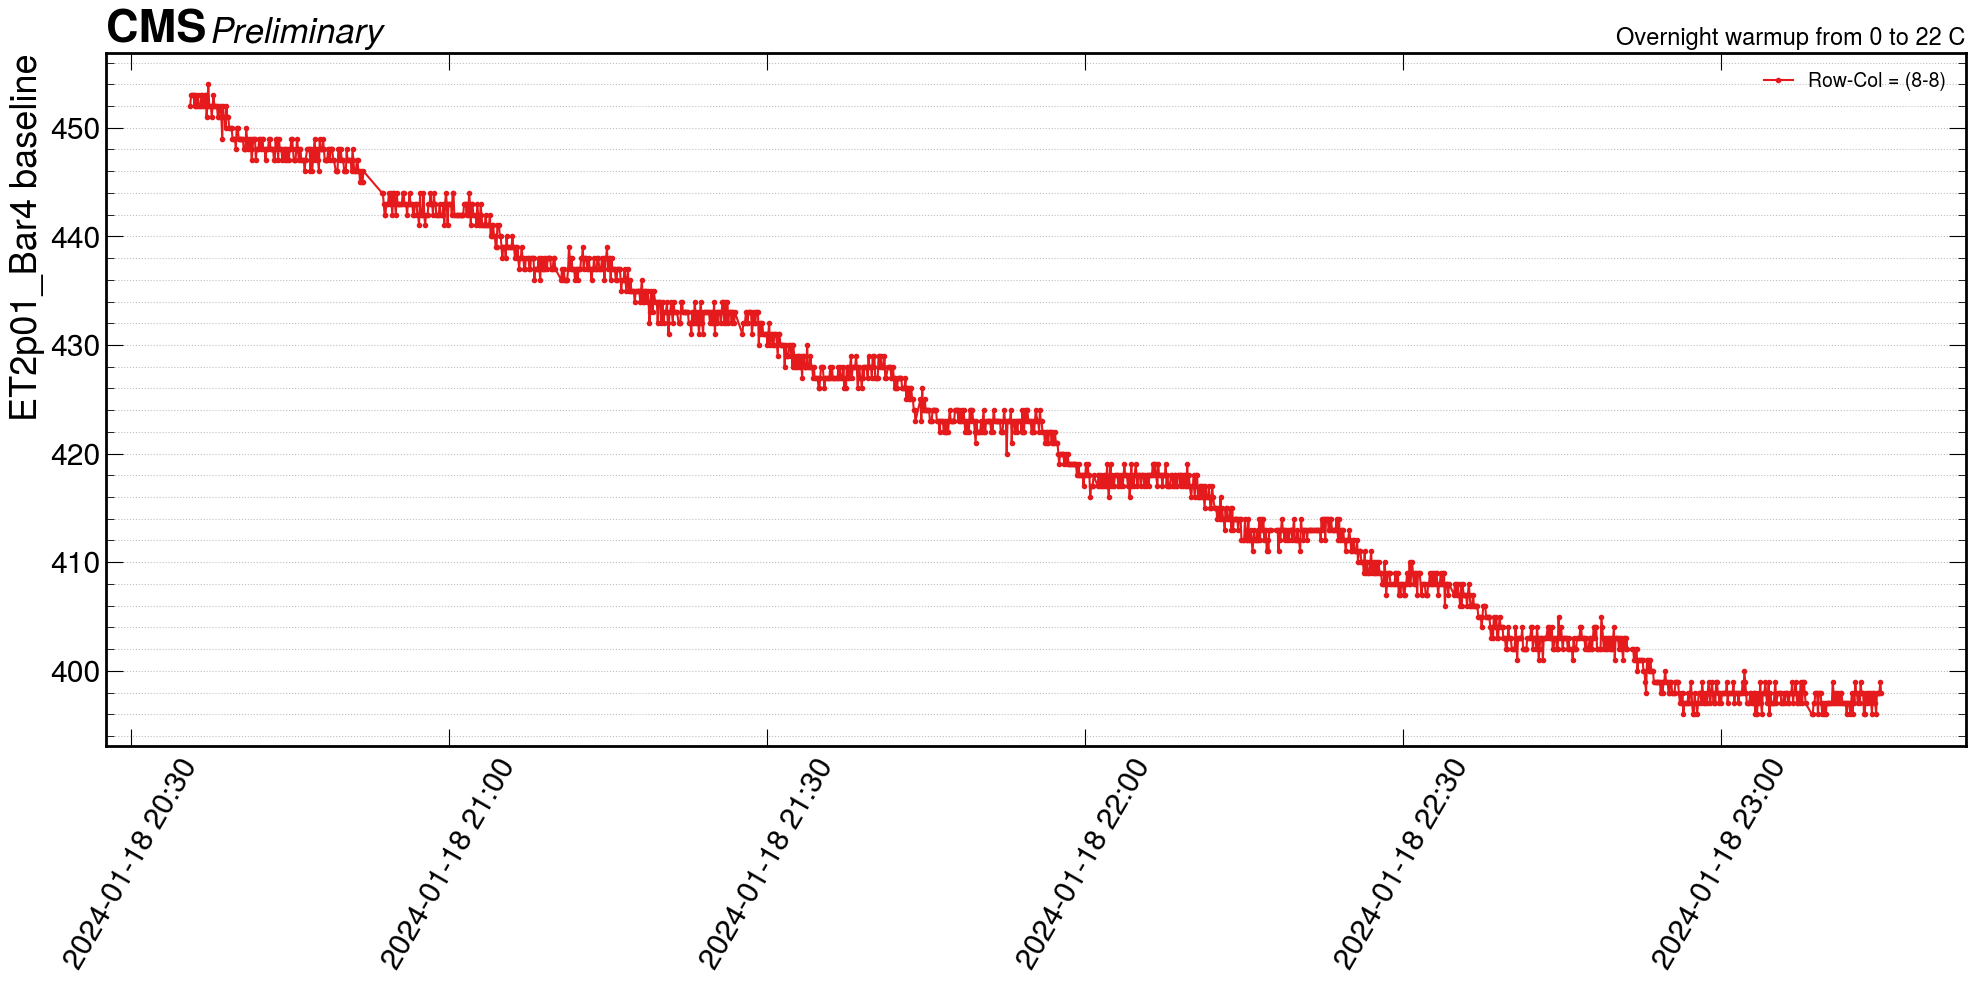

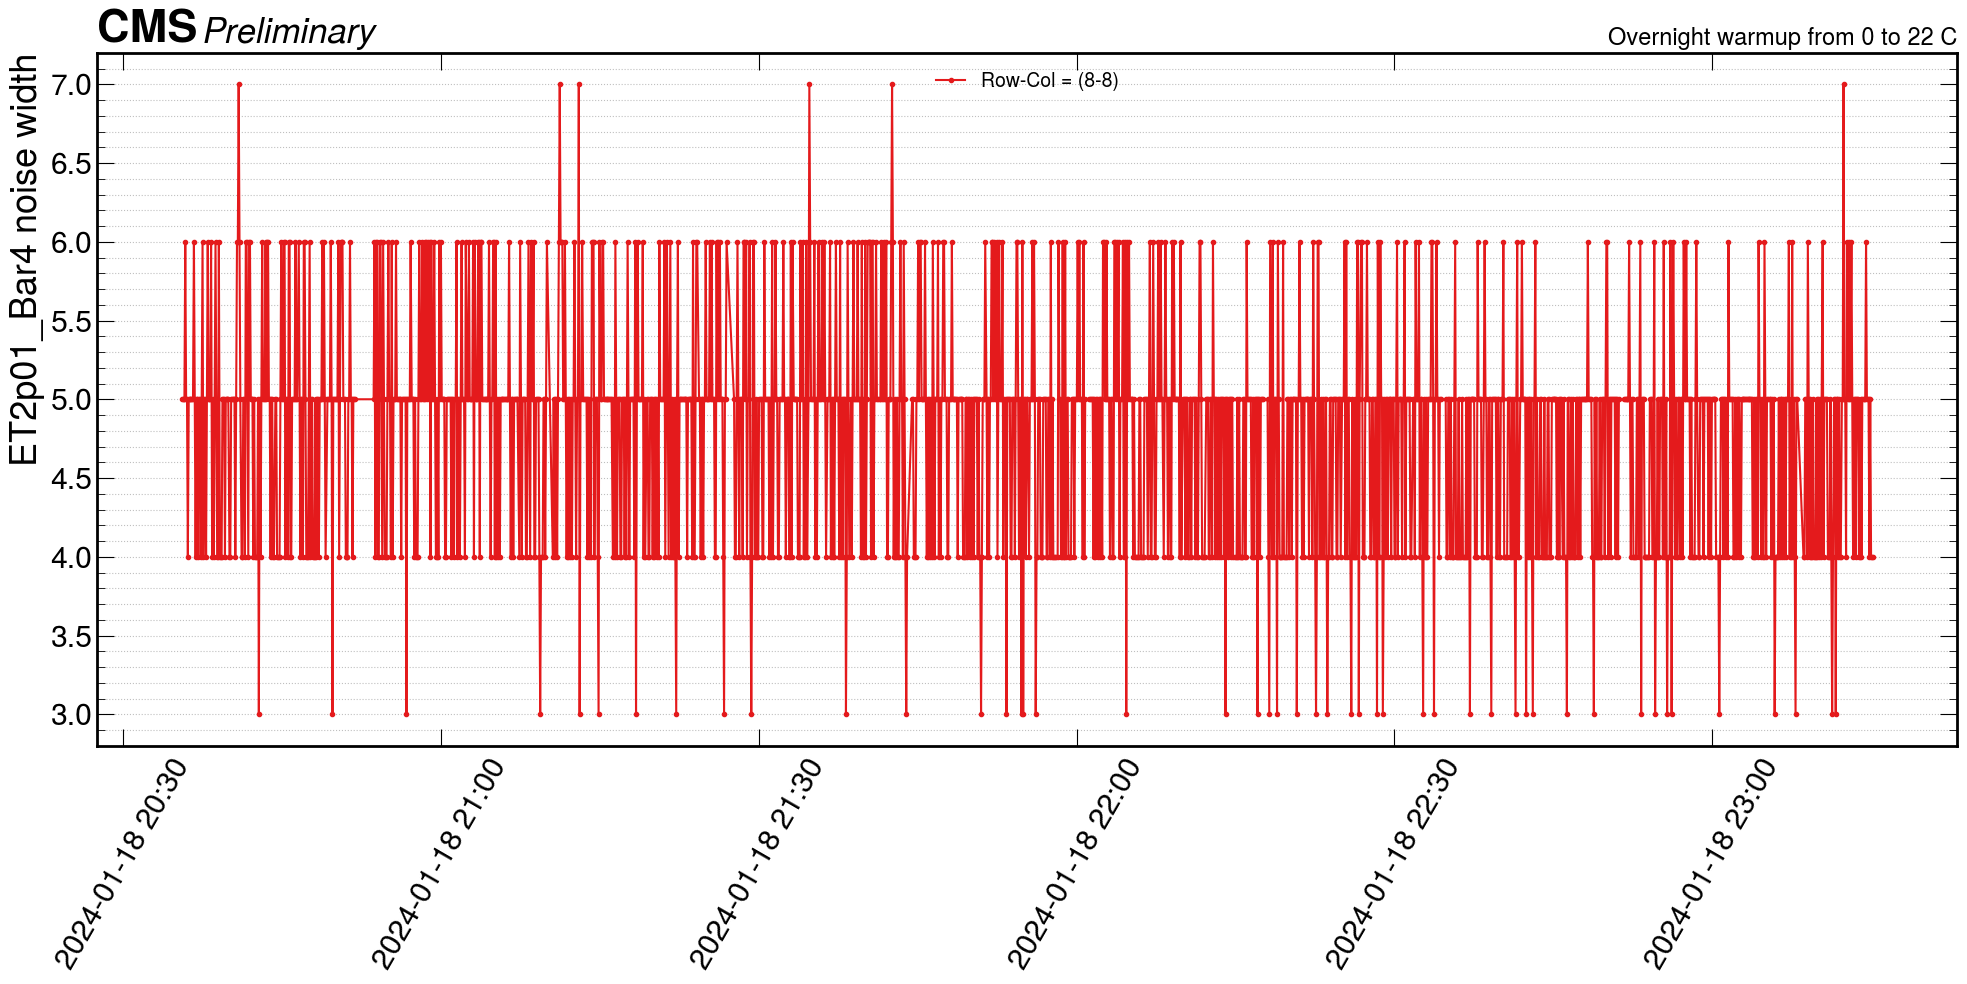

In [178]:
scan_list = [(row,col)] # (row, col)

time_cut = None # '2024-01-17 11:57:00'
note_cut = 'Overnight22C_Jan_18_2024_time_3s' # 'OvernightWarmup_Jan_18_2024_time_3s'
label = 'Overnight warmup from 0 to 22 C'

makePlot('baseline', chip_name, scan_list, time_cut, note_cut, label)
makePlot('noise_width', chip_name, scan_list, time_cut, note_cut, label)

## Deprecated

In [ ]:
# def mapDrawing(input_df, figname):
#     # Create a pivot table to reshape the DataFrame
#     pivot_table = input_df.pivot(index='row', columns='col', values='baseline')
#     baseline = pivot_table.values

#     pivot_table = input_df.pivot(index='row', columns='col', values='noise_width')
#     noisewidth = pivot_table.values

#     fig = plt.figure(dpi=200, figsize=(10,10))
#     gs = fig.add_gridspec(1,2)

#     ax0 = fig.add_subplot(gs[0,0])
#     ax0.set_title("BL (DAC LSB)", size=8)
#     img0 = ax0.imshow(baseline, interpolation='none')
#     ax0.set_aspect("equal")
#     ax0.invert_xaxis()
#     ax0.invert_yaxis()
#     plt.xticks(range(16), range(16), rotation="vertical")
#     plt.yticks(range(16), range(16))
#     divider = make_axes_locatable(ax0)
#     cax = divider.append_axes('right', size="5%", pad=0.05)
#     fig.colorbar(img0, cax=cax, orientation="vertical")

#     ax1 = fig.add_subplot(gs[0,1])
#     ax1.set_title("NW (DAC LSB)", size=8)
#     img1 = ax1.imshow(noisewidth, interpolation='none')
#     ax1.set_aspect("equal")
#     ax1.invert_xaxis()
#     ax1.invert_yaxis()
#     plt.xticks(range(16), range(16), rotation="vertical")
#     plt.yticks(range(16), range(16))
#     divider = make_axes_locatable(ax1)
#     cax = divider.append_axes('right', size="5%", pad=0.05)
#     fig.colorbar(img1, cax=cax, orientation="vertical")

#     for x in range(16):
#         for y in range(16):
#             ax0.text(x,y,f"{baseline.T[x,y]:.0f}", c="white", size=5, rotation=45, fontweight="bold", ha="center", va="center")
#             ax1.text(x,y,f"{noisewidth.T[x,y]:.0f}", c="white", size=5, rotation=45, fontweight="bold", ha="center", va="center")

#     fig.savefig(f'{figname}.png')

# def baselineAmongTime(chip_name, figname, scan_list):

#     if len(scan_list) > 6:
#         ValueError("This function design to take maximum 6 pixels. First 3 pixels for irradiated and the rest 3 pixels for non-irradiated.")

#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(24,9))
#     ax.set_prop_cycle(color=['#e41a1c','#ff7f00','#377eb8','#4daf4a','#984ea3','#ffff33']) # Red, Orange, Blue, Green, Purple, Yellow

#     scan_list = [(0, 0), (0, 1), (7, 7), (7, 6)] # (row, col)
#     i = 0
#     for row, col in scan_list:
#         tmp_cal = df[(df['chip_name'] == chip_name) & (df['row'] == row) & (df['col'] == col)  & (df['baseline'] != 0)]
#         tmp_cal['timestamp'] = pd.to_datetime(tmp_cal['timestamp'])

#         ax.plot(tmp_cal['timestamp'], tmp_cal['baseline'], '.-', label=f'Row-Col = ({row}-{col})')

#         # Set x-axis labels with line breaks using LaTeX notation
#         if i == 0:
#             x_labels = [f'{row["note"].replace(f"_{chip_name}","")}\n{row["timestamp"].strftime("%Y-%m-%d %H:%M")}' for index, row in tmp_cal.iterrows()]
#             ax.set_xticks(tmp_cal['timestamp'])
#             ax.set_xticklabels(x_labels, rotation=90, fontsize=9)

#         i += 1

#     ax.grid(which='both', axis='y')
#     ax.xaxis.set_minor_locator(plt.NullLocator())
#     ax.legend()

#     # Set labels for other axes as needed
#     ax.set_ylabel(f'{chip_name} Baseline')
#     fig.savefig(f'{figname}.png')